In [3]:
library(Seurat)
library(tidyverse)


In [4]:
source("../00_preprocessing/splitwrapper.R")
source(paste0("../00_preprocessing/preprocessing.R"))
source(paste0("../01_milo/milo.R"))
source(paste0("../01_milo/milo_plotting.R"))
source(paste0("../00_cellbender/cellbender_preprocess.R"))
source("../00_cellbender/process_seurat.R")
source('milo_cellbender.R')

In [5]:
obj_neuron = qs::qread('_targets/objects/exp_labelled_neuron')
obj_neuron

An object of class Seurat 
29799 features across 105096 samples within 2 assays 
Active assay: integrated (2000 features, 2000 variable features)
 2 layers present: data, scale.data
 1 other assay present: RNA
 2 dimensional reductions calculated: pca, umap

In [6]:
obj_neuron %>%  
set_labels_to_lvl1 %>%
set_batch_to_lane %>%
prep_obj_for_milo_cb_v01 %>%
`[[` %>%
select(labels) %>%
group_by(labels) %>%
summarise(n = n()) %>%
arrange(desc(n))

labels,n
<chr>,<int>
Irx5__Lmx1a,5064
Agrp,4656
Lepr_4,4595
Lepr_8,4313
Ppp1r17__Tafa4,4001
Met__Prlh,3985
Trh__Cxcl12,3481
Htr3b,3417
Slc17a6__Trhr,3396


In [7]:
set_assay_to_rna = function(obj){
    DefaultAssay(obj) = 'RNA'
    obj
}

In [8]:
reconsitute_rna_seurat = function(obj){
    mat = obj@assays$RNA$counts
    meta = obj %>% `[[`
    obj = CreateSeuratObject(counts = mat,
                             meta.data = meta,
                             names.field = 1, names.delim = "_",
                             min.features = 500, min.cells = 10)
    obj
}

In [14]:
obj = obj_neuron %>%
             set_labels_to_lvl1 %>%
             set_batch_to_lane %>%
             prep_obj_for_milo_cb_v01 %>%
             subset_exp_by_time('Day5') %>%
             single_split("Tmem215__Dach2") %>%
             reconsitute_rna_seurat %>%
             process_seurat(method = "integrate", 
                            batch ="isolation_date", 
                            dims = 30, res = 0.75)
obj

Normalizing layer: counts

Finding variable features for layer counts

Normalizing layer: counts

Finding variable features for layer counts

Normalizing layer: counts

Finding variable features for layer counts

Scaling features for provided objects

Computing within dataset neighborhoods

Finding all pairwise anchors

Projecting new data onto SVD

Projecting new data onto SVD

Finding neighborhoods

Finding anchors

	Found 835 anchors

Projecting new data onto SVD

Projecting new data onto SVD

Finding neighborhoods

Finding anchors

	Found 766 anchors

Projecting new data onto SVD

Projecting new data onto SVD

Finding neighborhoods

Finding anchors

	Found 829 anchors

Merging dataset 3 into 2

Extracting anchors for merged samples

Finding integration vectors

Finding integration vector weights

Integrating data

Merging dataset 1 into 2 3

Extracting anchors for merged samples

Finding integration vectors

Warning message:
“Different cells in new layer data than already exists fo

Modularity Optimizer version 1.3.0 by Ludo Waltman and Nees Jan van Eck

Number of nodes: 1473
Number of edges: 47809

Running Louvain algorithm...
Maximum modularity in 10 random starts: 0.8871
Number of communities: 16
Elapsed time: 0 seconds


An object of class Seurat 
19836 features across 1473 samples within 2 assays 
Active assay: integrated (2000 features, 2000 variable features)
 2 layers present: data, scale.data
 1 other assay present: RNA
 2 dimensional reductions calculated: pca, umap

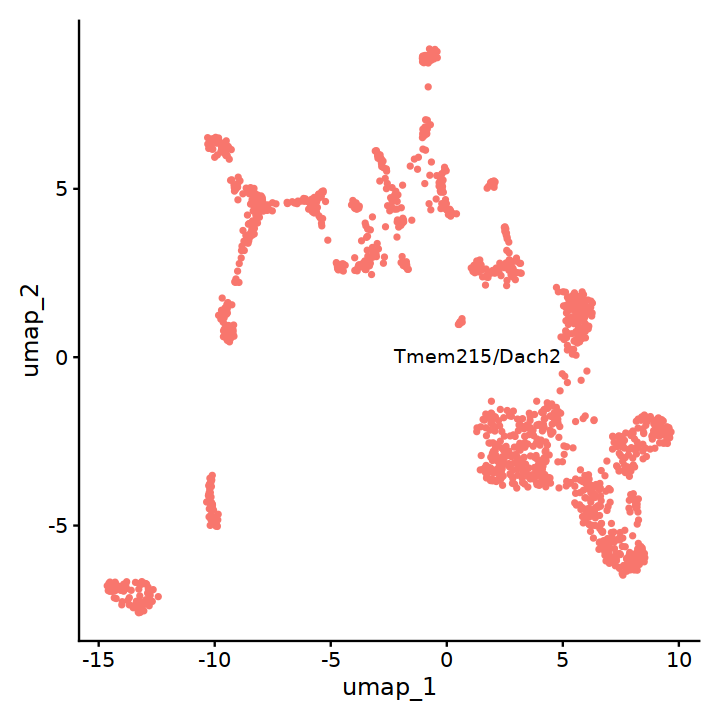

In [16]:
options(repr.plot.width=6, repr.plot.height=6)
Idents(obj) <- obj %>% `[[` %>% pull(labels_lvl1)
DimPlot(obj, reduction = "umap", label=T, repel = T) + NoLegend()

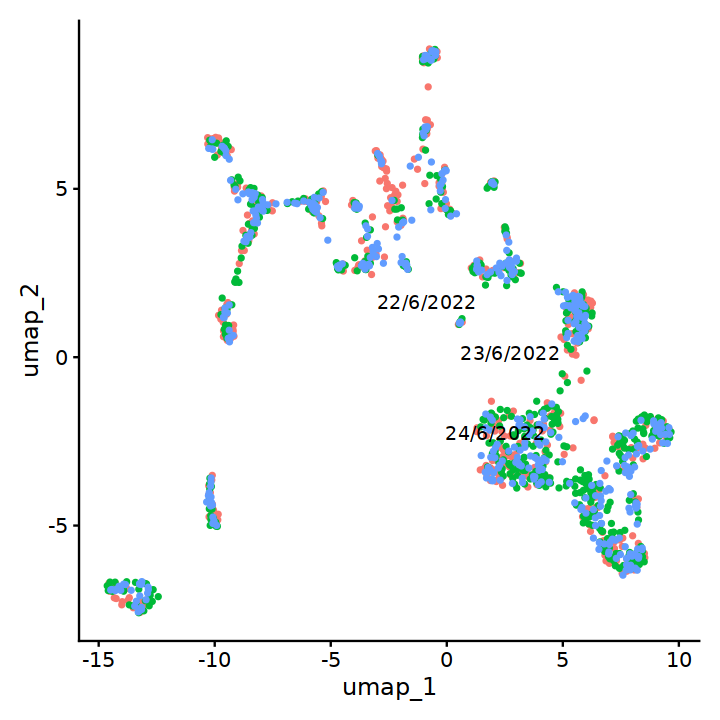

In [17]:
options(repr.plot.width=6, repr.plot.height=6)
Idents(obj) <- obj %>% `[[` %>% pull(isolation_date)
DimPlot(obj, reduction = "umap", label=T, repel = T) + NoLegend()

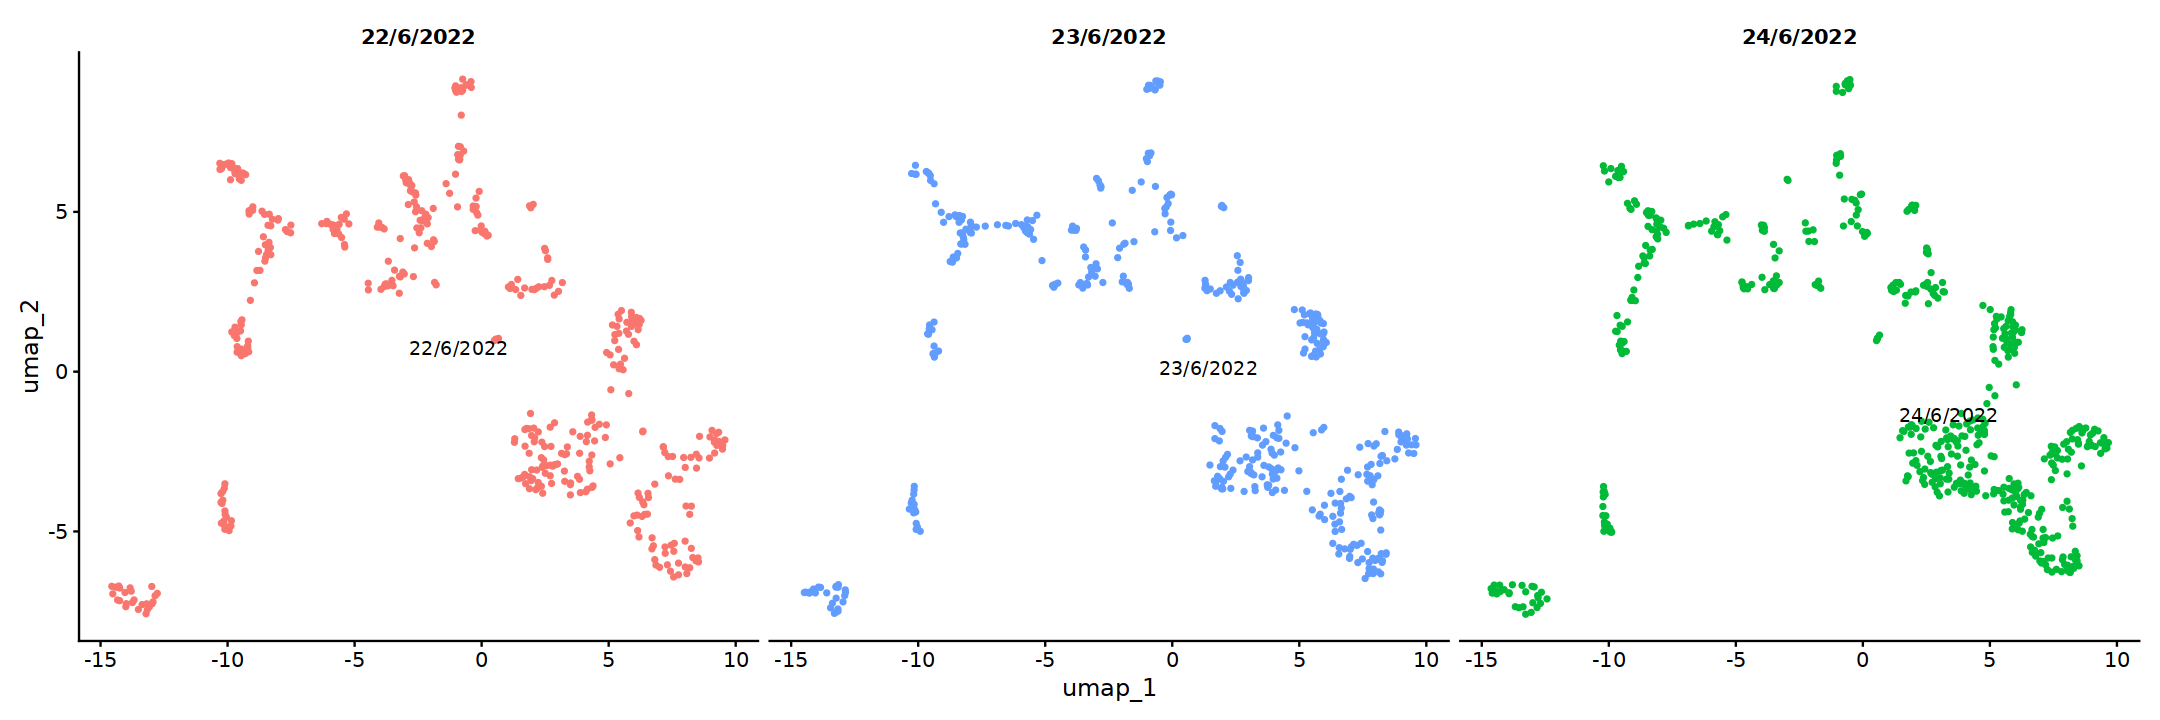

In [19]:
options(repr.plot.width=18, repr.plot.height=6)
Idents(obj) <- obj %>% `[[` %>% pull(isolation_date)
obj %>%
DimPlot(reduction = "umap", split.by = 'isolation_date', label=T, repel = T) + NoLegend()

In [10]:
obj = obj_neuron %>%
             set_labels_to_lvl1 %>%
             set_batch_to_lane %>%
             prep_obj_for_milo_cb_v01 %>%
             subset_exp_by_time('Day5') %>%
             single_split("Tmem215__Dach2") %>%
             reconsitute_rna_seurat

In [13]:
obj %>% sc_tr

ERROR: Error in sc(.): could not find function "sc"


In [22]:
targets::tar_meta(fields = error, complete_only = TRUE) %>%
filter(str_detect(name, 'Agrp'))

name,error
<chr>,<chr>
obj_Agrp,trying to get slot meta.data from an object of a basic class NULL with no slots
milo_Agrp,error in evaluating the argument x in selecting a method for function colData no applicable method for as.SingleCellExperiment applied to an object of class NULL
milo_index_tibble_Agrp,trying to get slot nhoodIndex from an object of a basic class NULL with no slots
design_df_Agrp,unable to find an inherited method for function colData for signature NULL
mm_Agrp,object group not found
nhm_Agrp___obobBL6,trying to get slot nhoods from an object of a basic class NULL with no slots
nhm_Agrp___obobFGF1BL6d5,trying to get slot nhoods from an object of a basic class NULL with no slots
nhm_Agrp___obob5v5,trying to get slot nhoods from an object of a basic class NULL with no slots
nhm_Agrp___obob14v14,trying to get slot nhoods from an object of a basic class NULL with no slots


In [ ]:
obj_milo = qs::qread('_targets/objects/milo_Day14.other')

In [ ]:
nh_graph_pl <- miloR::plotNhoodGraphDA(obj_milo, da_results, layout="UMAP",alpha=0.1) 

In [ ]:
nh_graph_pl

In [ ]:
umap_pl <- scater::plotReducedDim(obj_milo, dimred = "UMAP", colour_by="labels_lvl1", text_by = "labels_lvl1", 
                          text_size = 3, point_size=0.5) +
  guides(fill="none")

In [ ]:
umap_pl